# Bank Churn Prediction

### Data Set

bank.csv

### Objective

Build a neural network based classifier for a bank that can determine whether or not a bank customer will leave in the next 6 months.

## Load Liabries and Data

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [81]:
#Load data
Bank_Customer_df = pd.read_csv('bank.csv')

In [82]:
Bank_Customer_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [83]:
Bank_Customer_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [84]:
Bank_Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [85]:
Bank_Customer_df['Exited'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Exited, Length: 10000, dtype: bool

In [86]:
Bank_Customer_df['EstimatedSalary'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: EstimatedSalary, Length: 10000, dtype: bool

In [88]:
Bank_Customer_df = Bank_Customer_df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [89]:
Bank_Customer_df=Bank_Customer_df.fillna(method='ffill',limit=1)

In [98]:
Bank_Customer_df.shape

(10000, 11)

In [99]:
Bank_Customer_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


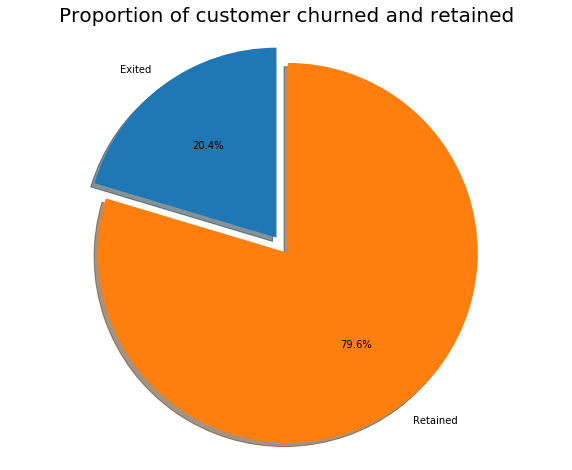

In [109]:
labels = 'Exited', 'Retained'
sizes = [Bank_Customer_df.Exited[Bank_Customer_df['Exited']==1].count(), Bank_Customer_df.Exited[Bank_Customer_df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [100]:
#Segregate input and output variables
x = Bank_Customer_df.iloc[:, 0:10]
y = Bank_Customer_df.iloc[:,10]

In [101]:
Geography=pd.get_dummies(x["Geography"])
Geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [102]:
Gender=pd.get_dummies(x['Gender'])
Gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [103]:
x=pd.concat([x,Geography,Gender],axis=1)
x=x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


## Train and Test Dataset Splitting:

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#output:

(8000, 13) (2000, 13) (8000,) (2000,)


In [105]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Neural Network Building and Model Training:

In [106]:
#create an object of sequential model
nn_classifier = Sequential()
# Add the first hidden layer
nn_classifier.add(Dense(units = 16 ,activation='relu',input_dim = 13))
# Adding the second hidden layer
nn_classifier.add(Dense(units = 16,activation='relu'))
# Adding the output layer
nn_classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [107]:
nn_classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
#model is trained over 100 epochs
model=nn_classifier.fit(x_train, y_train ,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4944 - accuracy: 0.7837 - val_loss: 0.4596 - val_accuracy: 0.8065
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.8102 - val_loss: 0.4439 - val_accuracy: 0.8088
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.8166 - val_loss: 0.4360 - val_accuracy: 0.8129
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8214 - val_loss: 0.4312 - val_accuracy: 0.8148
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8278 - val_loss: 0.4279 - val_accuracy: 0.8152
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8287 - val_loss: 0.4231 - val_accuracy: 0.8190
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4084 - accuracy: 0.8296 - val_loss: 0.4196 - val_accuracy: 0.8205

536/536 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8709 - val_loss: 0.3556 - val_accuracy: 0.8535
Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3193 - accuracy: 0.8712 - val_loss: 0.3549 - val_accuracy: 0.8576
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3193 - accuracy: 0.8705 - val_loss: 0.3552 - val_accuracy: 0.8569
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8714 - val_loss: 0.3552 - val_accuracy: 0.8561
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3175 - accuracy: 0.8705 - val_loss: 0.3577 - val_accuracy: 0.8519
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.8701 - val_loss: 0.3569 - val_accuracy: 0.8497
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8714 - val_loss: 0.3557 - val_accuracy: 0.8576
Epoch

## Prediction, Classification Report and Confusion matrix Plotting:

In [137]:
#Predicting the Test set results
y_pred = nn_classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [138]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [139]:
print(classification_report(y_test.astype('int'), y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1595
           1       0.67      0.52      0.59       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



## Confusion matrix and Plotting:

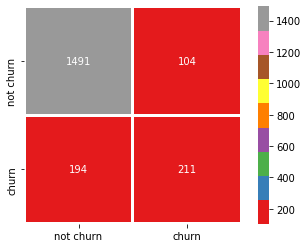

In [140]:
conf_matrix = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
sn.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
 xticklabels=["not churn","churn"],
 yticklabels=["not churn","churn"],
 linewidths = 2,linecolor = "w",cmap = "Set1")
plt.subplots_adjust(wspace = .3,hspace = .3)

## Visualize Loss & Accuracy

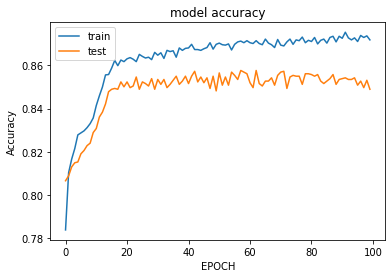

In [141]:
#Accuracy vs Value Accuracy
model.history.keys()
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

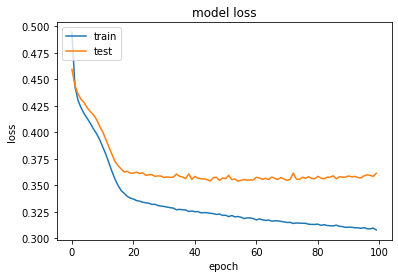

In [142]:
#loss vs value loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()